In [1]:
# python 2/3 compatibility
from __future__ import print_function
# numerical python
import numpy as np
# file management tools
import glob
import os
# good module for timing tests
import time
# plotting stuff
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# ability to read/write fits files
from astropy.io import fits
# fancy image combination technique
from astropy.stats import sigma_clip
# median absolute deviation: for photometry
from astropy.stats import mad_std
# photometric utilities
from photutils import DAOStarFinder,aperture_photometry, CircularAperture, CircularAnnulus, Background2D, MedianBackground
# periodograms
from astropy.stats import LombScargle
from regions import read_ds9, write_ds9
from astropy.wcs import WCS

import numpy.ma as ma
import warnings
import pandas as pd

warnings.filterwarnings("ignore")

np.set_printoptions(suppress=True)

In [2]:
from DifferentialPhotometry_functions import *

## Initial setup: 

You will need to define the data directory where your images exist, a region file that you have created for the target members in your field, and a fits image with WCS information. 

Also, define a signal to noise threshold for detrending the photometry.  If detrending fails, lower the threshold. 

In [3]:
# name of field
target = "praesepe"
filt = 'R' 

#location of data
datadir = '/Volumes/ARCTURUS/WIYN09/SmallStack_' + target + '/' + filt + '/'
savedir = '/Volumes/ARCTURUS/WIYN09/plots/' + target + '/' + filt + '/'

if not os.path.exists(savedir):
    os.makedirs(savedir)

#grab data
im = glob.glob(datadir + '*N*.fits')

#S/N threshold
sn_thresh=3

# For your own data, modify as needed
# wcs_image = '/Volumes/ARCTURUS/WIYN09/RegionFiles/' + target+ '/' + target + '_WCS.fits'
wcs_image = '/Volumes/ARCTURUS/WIYN09/SmallStack_' + target + '/' + 'I' + '/' +  'ss_praesepe_I_N15.2_WCS.fits'

#praesepe
#ss_praesepe_V_N15.2_WCS.fits

#optional region file 
wcs_region = '/Volumes/ARCTURUS/WIYN09/RegionFiles/' + target + '/' + target + '_VZ_sm.reg'

In [4]:
print(f"Number of images found: {len(im)}")
print(np.array(im))

Number of images found: 24
['/Volumes/ARCTURUS/WIYN09/SmallStack_praesepe/R/ss_praesepe_R_N1.0.fits'
 '/Volumes/ARCTURUS/WIYN09/SmallStack_praesepe/R/ss_praesepe_R_N1.1.fits'
 '/Volumes/ARCTURUS/WIYN09/SmallStack_praesepe/R/ss_praesepe_R_N4.0.fits'
 '/Volumes/ARCTURUS/WIYN09/SmallStack_praesepe/R/ss_praesepe_R_N4.1.fits'
 '/Volumes/ARCTURUS/WIYN09/SmallStack_praesepe/R/ss_praesepe_R_N6.0.fits'
 '/Volumes/ARCTURUS/WIYN09/SmallStack_praesepe/R/ss_praesepe_R_N6.1.fits'
 '/Volumes/ARCTURUS/WIYN09/SmallStack_praesepe/R/ss_praesepe_R_N6.2.fits'
 '/Volumes/ARCTURUS/WIYN09/SmallStack_praesepe/R/ss_praesepe_R_N6.3.fits'
 '/Volumes/ARCTURUS/WIYN09/SmallStack_praesepe/R/ss_praesepe_R_N9.0.fits'
 '/Volumes/ARCTURUS/WIYN09/SmallStack_praesepe/R/ss_praesepe_R_N9.1.fits'
 '/Volumes/ARCTURUS/WIYN09/SmallStack_praesepe/R/ss_praesepe_R_N11.0.fits'
 '/Volumes/ARCTURUS/WIYN09/SmallStack_praesepe/R/ss_praesepe_R_N11.1.fits'
 '/Volumes/ARCTURUS/WIYN09/SmallStack_praesepe/R/ss_praesepe_R_N12.0.fits'
 '/Volum

In [ ]:
aprad=20.  # aperture radius for HDI
skybuff=14.  # sky annulus inner radius
skywidth=18.  # sky annulus outer radius

In [ ]:
# sensitivities for star finding
nsigma=4.5 # detection threshold in sigma 
FWHM=5. # pixels 

In [ ]:
## do starfind on one of the images.
print(im[-1])
xpos, ypos, nstars = StarFind(im[-1], FWHM, nsigma)

/Volumes/ARCTURUS/WIYN09/SmallStack_praesepe/R/ss_praesepe_R_N15.2.fits
begin: DAOStarFinder
found 803 stars


In [ ]:
#find ra, dec coordinates of stars
hdr_wcs = fits.getheader(wcs_image)
w = construct_astrometry(hdr_wcs)
ra, dec = w.wcs_pix2world(xpos, ypos,0)

Found 24 images
making apertures


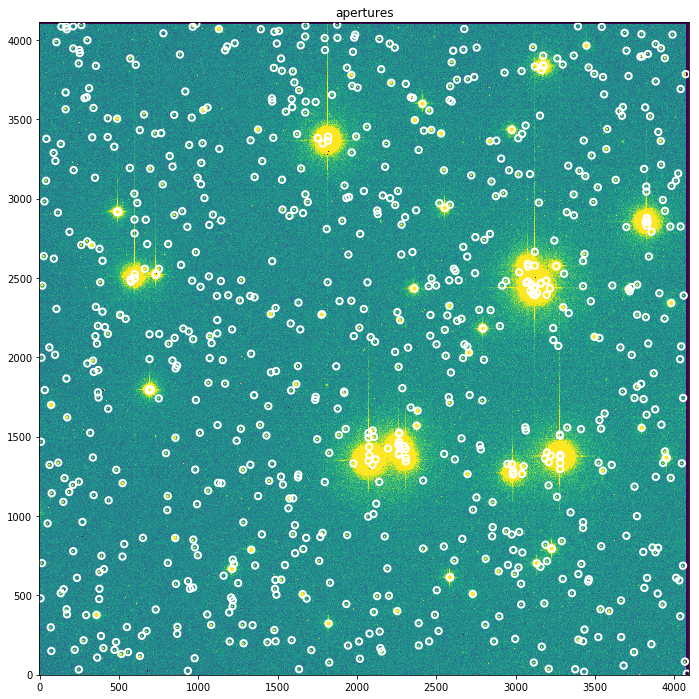

running aperture photometry on image:  0
running aperture photometry on image:  2
running aperture photometry on image:  5
running aperture photometry on image:  8
running aperture photometry on image:  10
running aperture photometry on image:  13
running aperture photometry on image:  16
running aperture photometry on image:  18
running aperture photometry on image:  21


In [ ]:
# Note that you will need to update the "timekey" keyword to pick the right header keyword from AIJ! 

times, Photometry_initial = doPhotometry(im, xpos, ypos,aprad, skybuff, skywidth)

In [ ]:
ePhotometry = doPhotometryError(im,xpos, ypos, aprad, skybuff, skywidth, Photometry_initial, manual=True, xboxcorner=1660, yboxcorner=2300, boxsize=200)



Found 24 images
running error analysis on image  0
Scatter in sky values:  25061.441352002625 , uncertainty in mean sky brightness:  4442.02482335998
Scatter in sky values:  24052.255527572685 , uncertainty in mean sky brightness:  4263.151293280969
running error analysis on image  2
Scatter in sky values:  15557.178468986207 , uncertainty in mean sky brightness:  2757.4380886578983
Scatter in sky values:  13464.035673339598 , uncertainty in mean sky brightness:  2386.4381877940014
Scatter in sky values:  25067.595212517368 , uncertainty in mean sky brightness:  4443.115566736708
running error analysis on image  5
Scatter in sky values:  24241.919227251026 , uncertainty in mean sky brightness:  4296.768308768155
Scatter in sky values:  20977.713614760945 , uncertainty in mean sky brightness:  3718.202927967611
Scatter in sky values:  23218.79899869547 , uncertainty in mean sky brightness:  4115.424969863893
running error analysis on image  8
Scatter in sky values:  22379.25379494697 , 

In [ ]:
def target_list(memberlist, ra_all, dec_all):
    #checks to see if memberlist is a tuple or region file
    if isinstance(memberlist, tuple):
        ra_mem = [memberlist[0]]
        dec_mem = [memberlist[1]]
    elif isinstance(memberlist, str):
        try:
            regions = read_ds9(memberlist)
            ra_mem = [i.center.ra.deg for i in regions]
            dec_mem = [i.center.dec.deg for i in regions]
        except:
            print('memberlist must be a region file or tuple')
        
    else:
        ValueError('memberlist must be region file or tuple')
    
    print('number of targets: {}'.format(len(ra_mem)))
    
    
    #finds your target star index in the catalog found with DAOStarFinder
    c = SkyCoord(ra=ra_mem*u.degree, dec=dec_mem*u.degree)  
    catalog = SkyCoord(ra=ra_all*u.degree, dec=dec_all*u.degree)  
    
    plt.figure(figsize=(12,12))
    ax = plt.subplot(projection=w)
    interval = ZScaleInterval()
    vmin, vmax = interval.get_limits(fits.getdata(wcs_image))
    ax.imshow(fits.getdata(wcs_image), vmin=vmin, vmax=vmax)
    
    
    ax.scatter(ra_mem, dec_mem, transform=ax.get_transform('fk5'), s=100,
           edgecolor='red', facecolor='none')
    
    
 
    idx, d2d, d3d = c.match_to_catalog_sky(catalog)  
    ax.scatter(ra_all[idx], dec_all[idx], transform=ax.get_transform('fk5'), s=5,edgecolor='k', facecolor='none')

    plt.show()
    
#     max_sep = 10.0 * u.arcsec 
#     ind, d2d, d3d = c.match_to_catalog_3d(catalog) 
#     sep_constraint = d2d < max_sep 
    
#     idx = ind[sep_constraint]
    
    return idx, ra_all[idx], dec_all[idx]




number of targets: 58


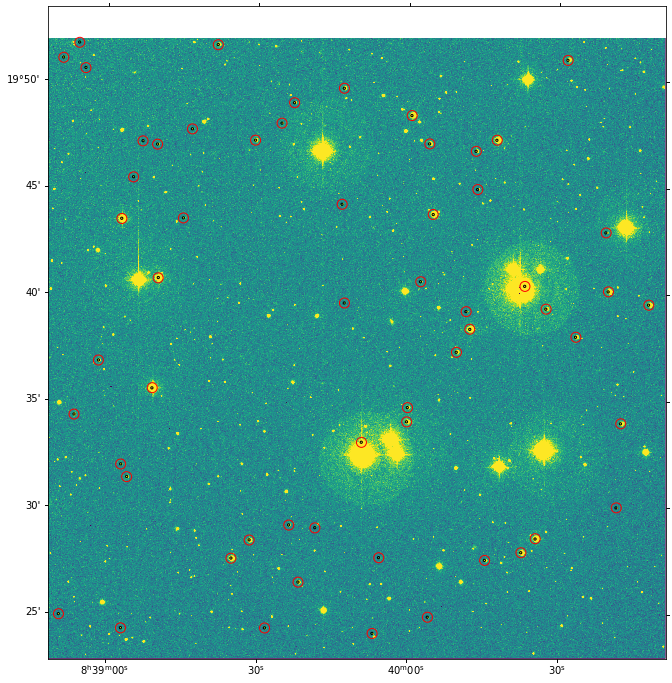

indices of targets in starfinder catalogue: [ 23  30  31  50  53  90 122 124 125 134 151 152 169 176 188 214 233 276
 304 307 312 315 341 364 377 397 410 438 443 445 449 463 479 495 499 541
 567 569 575 588 604 624 646 662 663 667 669 670 677 684 694 710 725 755
 769 775 791 797]
number of target stars found: 58


In [ ]:
#find ra, dec coordinates of stars

#using region file
memberlist = wcs_region
 
    
#manual inputting 1 star
# ra_in, dec_in = w.wcs_pix2world([2402],[2076],1)
# memberlist = (ra_in, dec_in)

#determine index, ra, dec of target stars from the DAOstarfinder catalogue.
idx, RA, DEC = target_list(memberlist, ra, dec)
print('indices of targets in starfinder catalogue: {}'.format(idx) )
print('number of target stars found: {}'.format(len(idx)))

In [ ]:
print('indices of targets in starfinder catalogue: {}'.format(idx) )
print('number of target stars found: {}'.format(len(idx)))

indices of targets in starfinder catalogue: [ 23  30  31  50  53  90 122 124 125 134 151 152 169 176 188 214 233 276
 304 307 312 315 341 364 377 397 410 438 443 445 449 463 479 495 499 541
 567 569 575 588 604 624 646 662 663 667 669 670 677 684 694 710 725 755
 769 775 791 797]
number of target stars found: 58


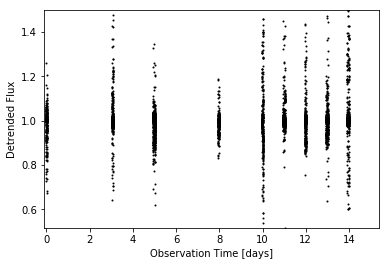

In [ ]:
#detrend photometry and plot 

Photometry, cPhotometry = detrend(idx, Photometry_initial, ePhotometry, nstars, sn_thresh)

plotPhotometry(times,cPhotometry)

Bin Percentiles to check: [  0.  20.  40.  60.  80. 100.]


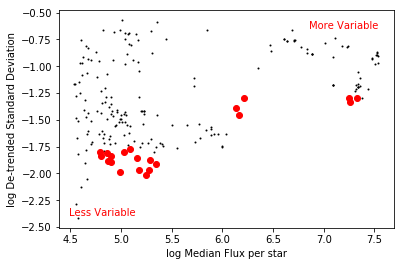

In [ ]:
# determine most accurate comparison stars 
most_accurate = findComparisonStars(Photometry, cPhotometry) # comp_num= (can set this)

In [ ]:
#run differential photometry on all stars
dPhotometry, edPhotometry, tePhotometry  = runDifferentialPhotometry(Photometry_initial, ePhotometry, nstars, most_accurate, sn_thresh=2)

running differential photometry on star:  1 / 803


In [ ]:
#pull out differential photometry for target stars and save to .npz file
tar_ra, tar_dec, tar_xpos, tar_ypos, time, flux, fluxerr, foldedphase, totperiod, totpower  = diffPhot_IndividualStars(savedir, idx, ra, dec, xpos, ypos, dPhotometry, edPhotometry, tePhotometry,times, target, filt, wcs_image, most_accurate)
#


In [ ]:
#open data
data = np.load(savedir + 'differentialPhot_field' + target + filt + '.npz')

#read column headers
data.files

print(len(data['ra']))


print((data['time']))
#access data with data['flux']

ind = np.where(data['time'] !=data['time'][3] )
print(ind)
time = data['time'][ind]

# Plot the lightcurve here!


In [ ]:
for star in np.arange(len(data['flux'])):
#     if star ==  12:
        
    fig = plt.figure(figsize=(12,12))
#     fig, (ax3, ax0, ax1, ax2) = plt.subplots(figsize=(15,4), nrows=1, ncols=4)
    time = data['time'][ind]

    ax0 = plt.subplot(222)
    ax0.errorbar(time, data['flux'][star][ind], yerr=data['fluxerr'][star][ind], fmt='ko')

    ax1 = plt.subplot(223)
    ax1.plot(data['period'][star], data['power'][star], 'k')

    ax2 = plt.subplot(224)
    ax2.plot(data['foldedphase'][star][ind]-1., data['flux'][star][ind], 'o', color='gray')
    ax2.plot(data['foldedphase'][star][ind], data['flux'][star][ind], 'ko')
    ax2.plot(data['foldedphase'][star][ind]+1., data['flux'][star][ind], 'o', color='gray')

    ax3 = plt.subplot(221, projection=w)
    interval = ZScaleInterval()
    vmin, vmax = interval.get_limits(fits.getdata(wcs_image))
    ax3.imshow(fits.getdata(wcs_image), vmin=vmin, vmax=vmax)
    ax3.scatter(data['ra'][star], data['dec'][star], transform=ax3.get_transform('fk5'), s=100,
       edgecolor='red', facecolor='none')


    ax0.set_xlabel('time [day]')
    ax0.set_ylabel('relative flux')
    ax1.set_xlabel('period [days]')
    ax1.set_ylabel('power')
    ax2.set_xlabel('phase')
    ax2.set_ylabel('relative flux')

#     ax0.set_ylim(0.8, 1.2)
#     print('flux:', data2['flux'][star])
#     print('phase:',data2['foldedphase'][star])
#     print('fluxerr:',data2['fluxerr'][star])
#     print('-------------')
    fig.suptitle('star at: (RA, DEC) = (' + str(round(data['ra'][star],4)) + ', ' + str(round(data['dec'][star],4)) + ')' )
    fig.savefig(savedir + target + '_' + filt + '_' + str(round(data['ra'][star],4)) + '_' + str(round(data['dec'][star],4)) + '.pdf')
plt.show()